In [1]:
import pandas as pd
import numpy as np 
import pickle5
import matplotlib.pyplot as plt
import datetime

In [2]:
# under_utilization data
with open("../data/under_utilization_combinedStations_laggedV5.pkl", "rb") as fh:
    df = pickle5.load(fh)
    
df.head(3)

,life_time,datetime_start,datetime_end,latitude,longitude,distance_center_km,Station_Name,weekday_b,weekday_b_name,hour_b,...,near_inactivity_4H,near_charge_events_4H,near_charge_time_5H,near_charge_energy_5H,near_inactivity_5H,near_charge_events_5H,near_charge_time_6H,near_charge_energy_6H,near_inactivity_6H,near_charge_events_6H
0,928.5,2018-01-31 19:51:00,2018-02-01 11:19:30,40.018482,-105.281066,0.152203,COMM VITALITY / 1104 SPRUCE1,2,Wednesday,19,...,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
1,363.5,2018-02-01 14:03:00,2018-02-01 20:06:30,40.018482,-105.281066,0.152203,COMM VITALITY / 1104 SPRUCE1,3,Thursday,14,...,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
2,6828.5,2018-02-01 21:15:00,2018-02-06 15:03:30,40.018482,-105.281066,0.152203,COMM VITALITY / 1104 SPRUCE1,3,Thursday,21,...,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0


In [6]:
df.shape

(12699, 63)

### Get the inactivity

In [7]:
stations = ['BOULDER / ALPINE ST1', 'BOULDER / ATRIUM ST1',
       'BOULDER / BASELINE ST1', 'BOULDER / BOULDER PARK',
       'BOULDER / EAST REC', 'BOULDER / FACILITIES ST1',
       'BOULDER / JUNCTION ST1', 'BOULDER / N BOULDER REC 1',
       'BOULDER / REC CENTER', 'BOULDERJUNCTION / JUNCTION ST1',
       'COMM VITALITY / 1000WALNUT', 'COMM VITALITY / 1100WALNUT1',
       'COMM VITALITY / 1104 SPRUCE1', 'COMM VITALITY / 1400 WALNUT1',
       'COMM VITALITY / 1500PEARL', 'COMM VITALITY / 2200 BROADWAY1',
       'COMM VITALITY / BOULDER JCTN']

In [8]:
dictt = {}
lvl = []

for stat in stations:
    temp = df[df['Station_Name'] == stat]
    start = min(temp['datetime_start'])
    end = max(temp['datetime_end'])
    inactivity = sum(temp['life_time'])
    diff = end-start
    
    days = diff.days
    seconds = diff.seconds
    total = days*(24*60) + seconds/60
    
    level = inactivity/total
    lvl.append(level)
    
    dictt[stat] = {'time':total, 'inac':inactivity, 'lvl':level}

In [9]:
import seaborn as sns

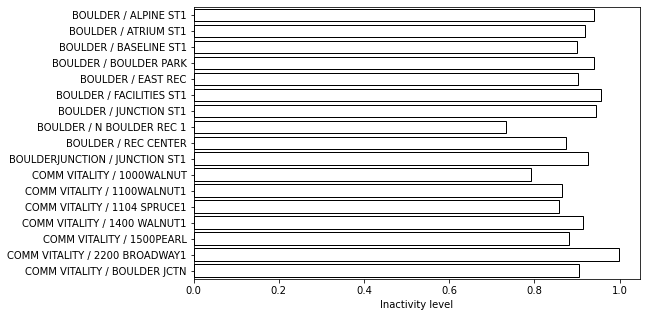

In [10]:
plt.rcParams['figure.figsize'] = (8,5) # Figure size
ax = sns.barplot(x=lvl, y=stations, color='w', edgecolor='k')
ax.set_xlabel("Inactivity level")
plt.show()

## Days active

In [11]:
days_act = []
for stat in stations:
    temp = df[df['Station_Name'] == stat]
    start = min(temp['datetime_start'])
    end = max(temp['datetime_end'])
    diff = end-start
    
    days = diff.days
    days_act.append(days)

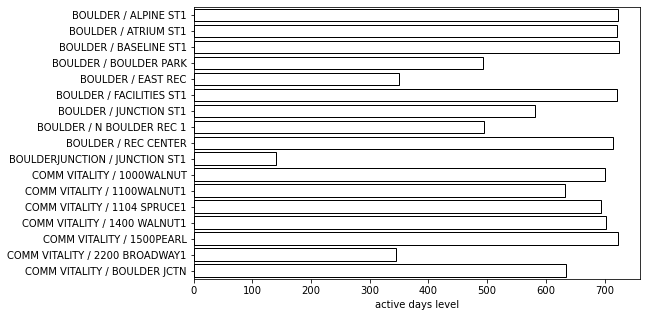

In [12]:
plt.rcParams['figure.figsize'] = (8,5) # Figure size
ax = sns.barplot(x=days_act, y=stations, color='w', edgecolor='k')
ax.set_xlabel("active days level")
plt.show()

### Number of events

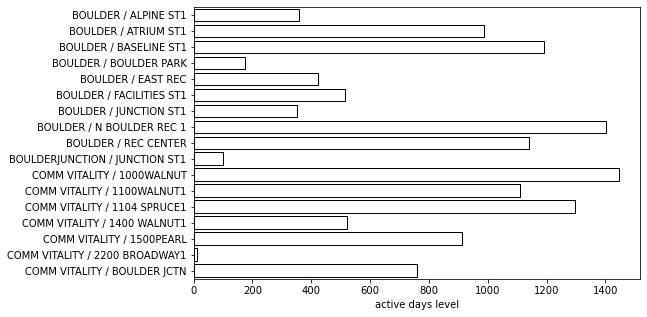

In [13]:
num_events = []
for stat in stations:
    temp = df[df['Station_Name'] == stat]
    num_events.append(len(temp))

plt.rcParams['figure.figsize'] = (8,5) # Figure size
ax = sns.barplot(x=num_events, y=stations, color='w', edgecolor='k')
ax.set_xlabel("active days level")
plt.show()

### Print

In [15]:
# dictt = {}

# for i in range(len(stations)):
#     print(stations[i])
#     dictt[stations[i]] = stations_new[i]

In [16]:

dictt = {'BOULDER / ALPINE ST1': 'ALPINE',
 'BOULDER / ATRIUM ST1': 'ATRIUM',
 'BOULDER / BASELINE ST1': 'BASELINE',
 'BOULDER / BOULDER PARK': 'BOULDER PARK',
 'BOULDER / EAST REC': 'EAST',
 'BOULDER / FACILITIES ST1': 'FACILITIES',
 'BOULDER / JUNCTION ST1': 'B. JUNCTION',
 'BOULDER / N BOULDER REC 1': 'N BOULDER',
 'BOULDER / REC CENTER': 'REC CENTER',
 'BOULDERJUNCTION / JUNCTION ST1': 'BJ. JUNCTION',
 'COMM VITALITY / 1000WALNUT': '1000 WALNUT',
 'COMM VITALITY / 1100WALNUT1': '1100 WALNUT',
 'COMM VITALITY / 1104 SPRUCE1': '1104 SPRUCE',
 'COMM VITALITY / 1400 WALNUT1': '1400 WALNUT',
 'COMM VITALITY / 1500PEARL': '1500 PEARL',
 'COMM VITALITY / 2200 BROADWAY1': '2200 BROADWAY',
 'COMM VITALITY / BOULDER JCTN': 'BOULDER JCTN'}

In [17]:
stations_new = ['ALPINE', 'ATRIUM', 'BASELINE', 'BOULDER PARK',
                'EAST', 'FACILITIES', 'B. JUNCTION', 'N BOULDER',
                'REC CENTER', 'BJ. JUNCTION', '1000 WALNUT', '1100 WALNUT', '1104 SPRUCE',
                '1400 WALNUT', '1500 PEARL', '2200 BROADWAY', 'BOULDER JCTN']

In [18]:
for i in range(len(stations)):
    print("{}:\nNumber of events: {}  Days active: {}  Percentage of time inactive: {}".format(stations_new[i],
                                                                                                num_events[i],
                                                                                                days_act[i],
                                                                                                round(lvl[i],3)) )

ALPINE:
Number of events: 357  Days active: 722  Percentage of time inactive: 0.939
ATRIUM:
Number of events: 988  Days active: 721  Percentage of time inactive: 0.92
BASELINE:
Number of events: 1190  Days active: 724  Percentage of time inactive: 0.899
BOULDER PARK:
Number of events: 176  Days active: 493  Percentage of time inactive: 0.939
EAST:
Number of events: 424  Days active: 350  Percentage of time inactive: 0.902
FACILITIES:
Number of events: 516  Days active: 721  Percentage of time inactive: 0.956
B. JUNCTION:
Number of events: 351  Days active: 581  Percentage of time inactive: 0.944
N BOULDER:
Number of events: 1403  Days active: 494  Percentage of time inactive: 0.733
REC CENTER:
Number of events: 1139  Days active: 714  Percentage of time inactive: 0.875
BJ. JUNCTION:
Number of events: 100  Days active: 141  Percentage of time inactive: 0.926
1000 WALNUT:
Number of events: 1445  Days active: 700  Percentage of time inactive: 0.792
1100 WALNUT:
Number of events: 1111  Day